# **Saloni J**

1. Take a 256x256 gray scale image((fx,y)) and find its DFT. Display the result.(use log transformation to display the result.

2. Smooth the image using a 5x5 Gaussian kernel. ( you may derive the 5x5 Gaussian kernel first, with signa = 1). Display the result.

3. Perform the above using DFTs.

4. Repeat the above using DoG and LoG Filters.

Saving man.png to man (1).png


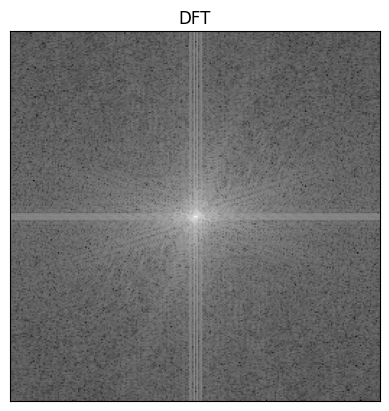

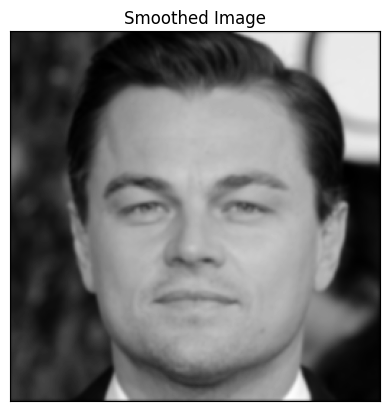

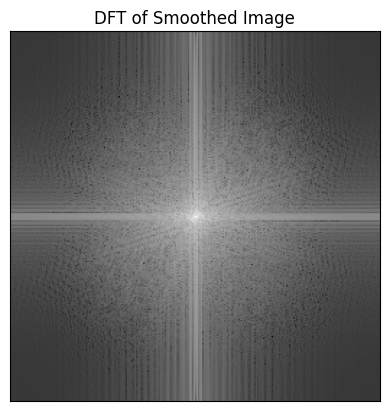

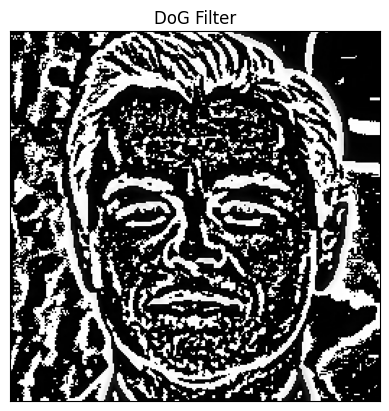

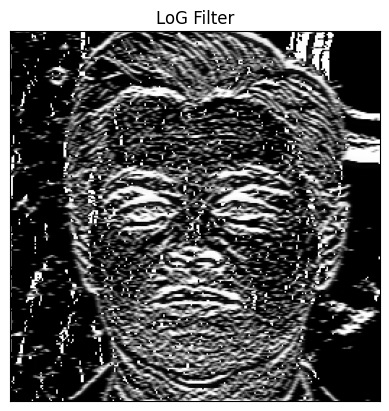

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_laplace
from google.colab import files
from scipy.signal import convolve2d

# Upload file
uploaded = files.upload()
man = next(iter(uploaded))

# Load grayscale image
img = cv2.imread(man, 0)

# Check if image is 256x256
if img.shape != (256, 256):
    print("Please upload a 256x256 image.")
else:
    # 1. Compute DFT and display result
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('DFT'), plt.xticks([]), plt.yticks([])
    plt.show()

    # 2. Smooth the image using a 5x5 Gaussian kernel
    sigma = 1
    size = 5
    gaussian_kernel = cv2.getGaussianKernel(size, sigma)
    gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel.transpose())
    smoothed_img = convolve2d(img, gaussian_kernel_2d, mode='same', boundary='fill', fillvalue=0)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Smoothed Image'), plt.xticks([]), plt.yticks([])
    plt.show()

    # 3. Perform the above using DFTs
    dft_smoothed = cv2.dft(np.float32(smoothed_img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_smoothed = np.fft.fftshift(dft_smoothed)
    magnitude_spectrum_smoothed = 20 * np.log(cv2.magnitude(dft_shift_smoothed[:,:,0], dft_shift_smoothed[:,:,1]))
    plt.imshow(magnitude_spectrum_smoothed, cmap='gray')
    plt.title('DFT of Smoothed Image'), plt.xticks([]), plt.yticks([])
    plt.show()

    # 4. Repeat the above using DoG and LoG Filters
    # Difference of Gaussians (DoG)
    dog = gaussian_filter(img, sigma) - gaussian_filter(img, 2*sigma)
    plt.imshow(dog, cmap='gray')
    plt.title('DoG Filter'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Laplacian of Gaussian (LoG)
    log = gaussian_laplace(img, sigma)
    plt.imshow(log, cmap='gray')
    plt.title('LoG Filter'), plt.xticks([]), plt.yticks([])
    plt.show()

